# N°X : Arbres de décisions

# I-Préparation des données 

## 1- Importation données

In [1]:
import pandas as pd
import numpy as np

# Importation dataset principal
Path = '/Users/mallou/Documents/Projet Data/Feux_USA/Datasets/raw/fires.csv'
df1 = pd.read_csv(Path, low_memory=False)

df1.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [2]:
# Importation dataset météo
Path2 = '/Users/mallou/Documents/Projet Data/Feux_USA/Datasets/external/US_wildfire_weather_data.cvs'
df2 = pd.read_csv(Path2, low_memory=False)

df2.head()

,temp_mean_0,prcp_sum_0,wspd_mean_0,temp_mean_10,prcp_sum_10,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180,OBJECTID
0,6.9,0.0,19.3,3.970,0.0,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905,1
1,6.8,0.0,9.5,10.155,5.5,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348,2
2,17.3,0.0,NaN,12.030,0.0,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244,3
3,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,4
4,14.7,0.0,6.0,14.690,0.0,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,5


In [3]:
#Merge des 2 datasets

df = df1.merge(df2, on = 'OBJECTID', how = 'left')
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,wspd_mean_10,temp_mean_30,prcp_sum_30,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,14.170000,4.646667,39.05,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,13.870000,8.133333,6.00,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,9.711111,11.323333,5.50,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,7.650000,13.303333,0.00,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105


In [4]:
data= """STATE,Types_Vegetation_Dominants,Caracteristiques_Principales,Climat
AL,Forêt,Forêts de feuillus; pins du Sud,Subtropical humide
AK,Toundra; Forêt,Toundra arctique; forêts boréales; 15 écorégions,Arctique à continental
AZ,Désert; Montagne,Désert de Sonora; saguaros; forêts de montagne,Aride à semi-aride
AR,Forêt,Forêts de feuillus; pins; montagnes Ozark,Subtropical humide
CA,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte méditerranéenne,Méditerranéen à désertique
CO,Montagne; Prairie,Montagnes Rocheuses; prairies alpines; forêts de conifères,Continental sec
CT,Forêt,Forêts tempérées de feuillus,Continental humide
DE,Forêt; Côtier,Forêts côtières; marécages,Subtropical humide
DC,Forêt,Forêts tempérées urbaines; parcs,Subtropical humide
FL,Côtier,Everglades; mangroves; forêts subtropicales,Tropical à subtropical
GA,Forêt,Forêts de feuillus; pins du Sud,Subtropical humide
HI,Côtier,Forêts tropicales; végétation volcanique,Tropical
ID,Montagne; Forêt,Forêts de conifères; montagnes Rocheuses,Continental sec
IL,Prairie,Prairies tempérées; terres agricoles,Continental humide
IN,Prairie,Prairies tempérées; forêts de feuillus,Continental humide
IA,Prairie,Prairies tempérées; grandes plaines,Continental humide
KS,Prairie,Grandes plaines; prairies à herbes courtes,Continental semi-aride
KY,Forêt,Forêts de feuillus; bluegrass,Subtropical humide
LA,Forêt; Côtier,Bayous; marécages; forêts subtropicales,Subtropical humide
ME,Forêt,Forêts boréales; conifères,Continental humide
MD,Forêt; Côtier,Forêts de feuillus; baie de Chesapeake,Subtropical humide
MA,Forêt,Forêts tempérées de feuillus,Continental humide
MI,Forêt,Forêts de feuillus et conifères; Grands Lacs,Continental humide
MN,Forêt; Prairie,Forêts boréales; prairies,Continental humide
MS,Forêt,Forêts de feuillus; pins du Sud,Subtropical humide
MO,Prairie,Prairies tempérées; forêts de feuillus,Continental humide
MT,Montagne; Prairie,Montagnes Rocheuses; grandes plaines,Continental sec
NE,Prairie,Grandes plaines; prairies à herbes courtes,Continental semi-aride
NV,Désert; Montagne,Désert du Grand Bassin; montagnes,Aride
NH,Forêt,Forêts tempérées; montagnes Blanches,Continental humide
NJ,Forêt; Côtier,Forêts de feuillus; côte atlantique,Subtropical humide
NM,Désert; Montagne,Désert de Chihuahua; montagnes Rocheuses,Aride à semi-aride
NY,Forêt,Forêts tempérées de feuillus; Adirondacks,Continental humide
NC,Forêt; Côtier,Forêts de feuillus; Appalaches; côte atlantique,Subtropical humide
ND,Prairie,Grandes plaines; prairies à herbes courtes,Continental semi-aride
OH,Forêt,Forêts de feuillus tempérées,Continental humide
OK,Prairie,Grandes plaines; prairies à herbes courtes,Continental semi-aride
OR,Forêt; Côtier,Forêts de conifères; côte pacifique,Océanique
PA,Forêt,Forêts tempérées de feuillus,Continental humide
RI,Forêt; Côtier,Forêts côtières tempérées,Continental humide
SC,Forêt; Côtier,Forêts subtropicales; côte atlantique,Subtropical humide
SD,Prairie,Grandes plaines; prairies à herbes courtes,Continental semi-aride
TN,Forêt,Forêts de feuillus; Appalaches,Subtropical humide
TX,Prairie; Désert,Grandes plaines; désert de Chihuahua; côte du Golfe,Continental à tropical
UT,Désert; Montagne,Désert du Grand Bassin; montagnes Rocheuses,Aride à semi-aride
VT,Forêt,Forêts tempérées; montagnes Vertes,Continental humide
VA,Forêt,Forêts de feuillus; Appalaches,Subtropical humide
WA,Forêt; Côtier,Forêts de conifères; côte pacifique,Océanique
WV,Forêt,Forêts de feuillus; Appalaches,Continental humide
WI,Forêt,Forêts de feuillus et conifères,Continental humide
WY,Prairie; Montagne,Grandes plaines; montagnes Rocheuses,Continental sec
PR,Côtier; Forêt,Forêts tropicales humides; mangroves; El Yunque,Tropical humide
"""

with open('vegetation_usa.csv', 'w', encoding='utf-8') as f:
    f.write(data)
    
df3=pd.read_csv('vegetation_usa.csv')
df3.head()

,STATE,Types_Vegetation_Dominants,Caracteristiques_Principales,Climat
0,AL,Forêt,Forêts de feuillus; pins du Sud,Subtropical humide
1,AK,Toundra; Forêt,Toundra arctique; forêts boréales; 15 écorégions,Arctique à continental
2,AZ,Désert; Montagne,Désert de Sonora; saguaros; forêts de montagne,Aride à semi-aride
3,AR,Forêt,Forêts de feuillus; pins; montagnes Ozark,Subtropical humide
4,CA,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique


In [5]:
df = df.merge(df3, on = 'STATE', how = 'left')
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,wspd_mean_20,temp_mean_60,prcp_sum_60,wspd_mean_60,temp_mean_180,prcp_sum_180,wspd_mean_180,Types_Vegetation_Dominants,Caracteristiques_Principales,Climat
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,10.910714,4.668421,94.9,11.946154,9.828977,287.05,10.686905,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,13.038333,8.100847,6.0,11.572881,3.219101,107.50,10.496348,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,10.455172,10.087931,6.0,11.286538,6.210651,107.50,10.915244,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,8.930000,11.035000,0.0,10.126667,4.577326,0.00,9.742105,Désert; Forêt; Côtier,Séquoias; chaparral; désert Mojave; côte médit...,Méditerranéen à désertique


In [6]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df.shape)

(1880465, 39)
(1830945, 16)
(52, 4)
(1880483, 57)


In [7]:
#Dataset météo 
missing_values = df.isna().sum()
missing_percent = (missing_values/len(df))*100
missing_table = pd.DataFrame({'Missing_values': missing_values, 'Missing_percent': missing_percent})
print(missing_table)

                              Missing_values  Missing_percent
OBJECTID                                   0         0.000000
FOD_ID                                     0         0.000000
FPA_ID                                     0         0.000000
SOURCE_SYSTEM_TYPE                         0         0.000000
SOURCE_SYSTEM                              0         0.000000
NWCG_REPORTING_AGENCY                      0         0.000000
NWCG_REPORTING_UNIT_ID                     0         0.000000
NWCG_REPORTING_UNIT_NAME                   0         0.000000
SOURCE_REPORTING_UNIT                      0         0.000000
SOURCE_REPORTING_UNIT_NAME                 0         0.000000
LOCAL_FIRE_REPORT_ID                 1459286        77.601659
LOCAL_INCIDENT_ID                     820824        43.649637
FIRE_CODE                            1555741        82.730926
FIRE_NAME                             960479        51.076186
ICS_209_INCIDENT_NUMBER              1854766        98.632426
ICS_209_

## 2- Mise au format des variables temporelles

In [8]:
# Conversion en format datetime (souvent format julian ou numérique à convertir)
if not pd.api.types.is_datetime64_any_dtype(df['DISCOVERY_DATE']):
    df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - 2440587.5, unit='D', origin='1970-01-01')

## 3- Création de nouvelles variables

In [9]:
#Variable végétation

# Séparer la chaîne en plusieurs colonnes
types_split = df['Types_Vegetation_Dominants'].str.split('; ', expand = True)

# Renommer automatiquement les colonnes si tu veux
types_split.columns = [f'Type_{i+1}' for i in range(types_split.shape[1])]

# Fusionner avec le DataFrame d'origine (optionnel)
df = pd.concat([df, types_split], axis=1)

In [10]:
# Création de nouvelles colonnes temporelles
df['YEAR'] = df['DISCOVERY_DATE'].dt.year
df['MONTH'] = df['DISCOVERY_DATE'].dt.month
df['DAY'] = df['DISCOVERY_DATE'].dt.day
df['DAY_NAME'] = df['DISCOVERY_DATE'].dt.day_name()
df['WEEKDAY'] = df['DISCOVERY_DATE'].dt.weekday

#Création de la variable SAISON
def saison(mois):
  if mois in [3,4,5]:
    return 'Printemps'
  elif mois in [6,7,8]:
    return 'Été'
  elif mois in [9,10,11]:
    return 'Automne'
  else:
    return 'Hiver'

df['SAISON'] = df['MONTH'].apply(saison)
df['SAISON'].value_counts()

#Création de la variable REGION
def region(Etat):
  if Etat in ['CT', 'ME', 'MA', 'NH', 'RI', 'VT'] :
    return 'NEW_ENGLAND'
  elif Etat in ['NJ', 'NY', 'PA'] :
    return 'MID_ATLANTIC'
  elif Etat in ['IL', 'IN', 'MI', 'OH', 'WI'] :
    return 'EAST_NORTH_CENTRAL'
  elif Etat in ['IA', 'KS', 'MN', 'MO', 'NE', 'ND','SD']:
    return 'WEST_NORTH_CENTRAL'
  elif Etat in ['DE', 'FL', 'GA', 'MD', 'NC',
   'SC', 'VA', 'WV', 'DC', 'VI']:
    return 'SOUTH_ATLANTIC'
  elif Etat in ['AL', 'KY', 'MS', 'TN']:
    return 'SOUTH_EAST_CENTRAL'
  elif Etat in ['AR', 'LA', 'OK', 'TX']:
    return 'WEST_SOUTH_CENTRAL'
  elif Etat in ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY']:
    return 'MOUNTAIN'
  elif Etat in ['AK', 'CA', 'HI', 'OR', 'WA']:
    return 'PACIFIC'
  elif Etat in ['PR']:
    return 'FREE_TERRITORY'

df['REGION'] = df['STATE'].apply(region)
df['REGION'].value_counts()

REGION
SOUTH_ATLANTIC        499379
PACIFIC               306907
MOUNTAIN              282533
WEST_SOUTH_CENTRAL    246936
SOUTH_EAST_CENTRAL    204043
WEST_NORTH_CENTRAL    128666
MID_ATLANTIC          115531
EAST_NORTH_CENTRAL     50267
NEW_ENGLAND            24140
FREE_TERRITORY         22081
Name: count, dtype: int64

In [ ]:
cherche_region = df[df['STATE'] == 'IA']
print(cherche_region['REGION'].head(1))

244312    PACIFIC
Name: REGION, dtype: object


In [13]:
def get_owner_options_by_state(df, state_col='STATE', owner_col='OWNER_DESCR'):
    """
    Crée un dictionnaire {État: [liste unique des propriétaires]} à partir d'un DataFrame.
    
    Parameters:
    - df : pd.DataFrame contenant au moins les colonnes state_col et owner_col
    - state_col : nom de la colonne pour l'État (default 'STATE')
    - owner_col : nom de la colonne pour le propriétaire (default 'OWNER_DESCR')
    
    Returns:
    - dict : clé = État, valeur = liste triée des options propriétaires uniques
    """
    owner_dict = {}
    for state, group in df.groupby(state_col):
        owners = sorted(group[owner_col].dropna().unique())
        owner_dict[state] = owners
    return owner_dict

# Récupération du dictionnaire pour tous les États
owner_options_by_state = get_owner_options_by_state(df)

# Affichage
for state, owners in owner_options_by_state.items():
    print(f"{state}: {owners}")


AK: ['BIA', 'BLM', 'BOR', 'COUNTY', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'TRIBAL', 'USFS']
AL: ['FWS', 'MISSING/NOT SPECIFIED', 'NPS', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'USFS']
AR: ['BIA', 'COUNTY', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'UNDEFINED FEDERAL', 'USFS']
AZ: ['BIA', 'BLM', 'BOR', 'FOREIGN', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'TRIBAL', 'UNDEFINED FEDERAL', 'USFS']
CA: ['BIA', 'BLM', 'BOR', 'COUNTY', 'FOREIGN', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'TRIBAL', 'UNDEFINED FEDERAL', 'USFS']
CO: ['BIA', 'BLM', 'BOR', 'COUNTY', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE', 'STATE OR PRIVATE', 'TRIBAL', 'UNDEFINED FEDERAL',

In [11]:
# Variable CIBLE
# Préparation de FIRE_SIZE_CLASS

#Supprimer la modalité A en supprimant les lignes
df = df[df['FIRE_SIZE_CLASS'] != 'A']

size_fire = {
    'B': 'small',
    'C': 'medium',
    'D': 'medium',
    'E': 'very_large',
    'F': 'very_large',
    'G': 'very_large'
}

df['SIZE_ENCODED'] = df['FIRE_SIZE_CLASS'].map(size_fire)
print(df)

         OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
7               8          8         FS-1418854                FED   
8               9          9         FS-1418856                FED   
13             14         14         FS-1418872                FED   
16             17         17         FS-1418878                FED   
17             18         18         FS-1418881                FED   
...           ...        ...                ...                ...   
1880474   1880457  300348328  2015CAIRS27369138             NONFED   
1880475   1880458  300348354  2015CAIRS28234594             NONFED   
1880476   1880459  300348361  2015CAIRS27957490             NONFED   
1880477   1880460  300348362  2015CAIRS28291374             NONFED   
1880481   1880464  300348377  2015CAIRS29218079             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
7         FS-FIRESTAT                    FS                USCASHF   
8         FS-FIREST

In [12]:
#Préparation de la variable STAT_CAUSE_DESCR

#Encodage à la main : 0=Humain, 1= Naturel, 2 = unknown
# Dictionnaire de regroupement
causes = {
    'Lightning': 'Naturel',
    'Debris Burning': 'Humain',
    'Miscellaneous': 'Humain',
    'Arson': 'Humain',
    'Equipment Use': 'Humain',
    'Campfire': 'Humain',
    'Children': 'Humain',
    'Smoking': 'Humain',
    'Railroad': 'Humain',
    'Powerline': 'Humain',
    'Fireworks': 'Humain',
    'Structure': 'Humain', 
    'Missing/Undefined': 'unknown',
    'Unknown': 'unknown'
}


# Appliquer le mapping
df['CAUSES_GROUP'] = df['STAT_CAUSE_DESCR'].map(causes)

# Vérifier les regroupements
print(df['CAUSES_GROUP'].value_counts())


CAUSES_GROUP
Humain     973625
Naturel    126072
unknown    113855
Name: count, dtype: int64


In [13]:
# Création de la variable PERIODE DAY 
df['PERIODE_DAY'] = df['DISCOVERY_TIME'].apply(lambda x: 'Matin Tôt' if x < 600 else ('Matinée' if x < 1200 else ('Après-Midi' if x < 1800 else ('Soirée' if x < 2100 else 'Nuit'))))

## 4- Choix des variables

In [14]:
#Garder que les variables qui nous intéressent

df.drop(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'Shape',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'STAT_CAUSE_CODE', 'OWNER_CODE','FIPS_NAME','FIPS_CODE', 'COUNTY', 'Caracteristiques_Principales', 'Types_Vegetation_Dominants', 'Type_2', 'Type_3'], axis = 1, inplace = True)
df.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,...,YEAR,MONTH,DAY,DAY_NAME,WEEKDAY,SAISON,REGION,SIZE_ENCODED,CAUSES_GROUP,PERIODE_DAY
7,8,2005,2005-03-08,67,1300.0,Debris Burning,0.8,B,40.968056,-122.433889,...,2005,3,8,Tuesday,1,Printemps,PACIFIC,small,Humain,Après-Midi
8,9,2005,2005-03-15,74,1200.0,Debris Burning,1.0,B,41.233611,-122.283333,...,2005,3,15,Tuesday,1,Printemps,PACIFIC,small,Humain,Après-Midi
13,14,2004,2004-09-28,272,1200.0,Campfire,6.0,B,38.433333,-120.510000,...,2004,9,28,Tuesday,1,Automne,PACIFIC,small,Humain,Après-Midi
16,17,2004,2004-10-06,280,1415.0,Equipment Use,16823.0,G,38.523333,-120.211667,...,2004,10,6,Wednesday,2,Automne,PACIFIC,very_large,Humain,Après-Midi
17,18,2004,2004-10-13,287,1618.0,Equipment Use,7700.0,G,38.780000,-120.260000,...,2004,10,13,Wednesday,2,Automne,PACIFIC,very_large,Humain,Après-Midi


# II- Préparation à la modélisation

In [15]:
#Dataset météo 
missing_values = df.isna().sum()
missing_percent = (missing_values/len(df))*100
missing_table = pd.DataFrame({'Missing_values': missing_values, 'Missing_percent': missing_percent})
print(missing_table)

                  Missing_values  Missing_percent
OBJECTID                       0         0.000000
FIRE_YEAR                      0         0.000000
DISCOVERY_DATE                 0         0.000000
DISCOVERY_DOY                  0         0.000000
DISCOVERY_TIME            628415        51.783113
STAT_CAUSE_DESCR               0         0.000000
FIRE_SIZE                      0         0.000000
FIRE_SIZE_CLASS                0         0.000000
LATITUDE                       0         0.000000
LONGITUDE                      0         0.000000
OWNER_DESCR                    0         0.000000
STATE                          0         0.000000
temp_mean_0               270695        22.306007
prcp_sum_0                 37358         3.078401
wspd_mean_0               267726        22.061354
temp_mean_10              225492        18.581157
prcp_sum_10                37358         3.078401
wspd_mean_10              225488        18.580827
temp_mean_30              220571        18.175653


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213552 entries, 7 to 1880481
Data columns (total 39 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   OBJECTID          1213552 non-null  int64         
 1   FIRE_YEAR         1213552 non-null  int64         
 2   DISCOVERY_DATE    1213552 non-null  datetime64[ns]
 3   DISCOVERY_DOY     1213552 non-null  int64         
 4   DISCOVERY_TIME    585137 non-null   float64       
 5   STAT_CAUSE_DESCR  1213552 non-null  object        
 6   FIRE_SIZE         1213552 non-null  float64       
 7   FIRE_SIZE_CLASS   1213552 non-null  object        
 8   LATITUDE          1213552 non-null  float64       
 9   LONGITUDE         1213552 non-null  float64       
 10  OWNER_DESCR       1213552 non-null  object        
 11  STATE             1213552 non-null  object        
 12  temp_mean_0       942857 non-null   float64       
 13  prcp_sum_0        1176194 non-null  float64    

In [17]:
# Obtenir la liste des États uniques
etats = df['STATE'].unique()

# Boucler sur chaque État
for etat in etats:
    df_etat = df[df['STATE'] == etat]
    print(f"\n--- État : {etat} ---")
    
    # Afficher les 10 premières coordonnées
    for lat, lon in zip(df_etat['LATITUDE'].head(10), df_etat['LONGITUDE'].head(10)):
        print(f"Latitude: {lat}, Longitude: {lon}")
    
    # Afficher le nombre total de points pour cet État
    print(f"Nombre de points pour {etat} : {len(df_etat)}")


--- État : CA ---
Latitude: 40.96805556, Longitude: -122.43388889
Latitude: 41.23361111, Longitude: -122.28333333
Latitude: 38.43333333, Longitude: -120.51
Latitude: 38.52333333, Longitude: -120.21166667
Latitude: 38.78, Longitude: -120.26
Latitude: 34.15388889, Longitude: -117.84111111
Latitude: 33.71888889, Longitude: -117.43361111
Latitude: 38.83972222, Longitude: -119.88638889
Latitude: 34.74833333, Longitude: -119.41027778
Latitude: 38.29444444, Longitude: -119.54
Nombre de points pour CA : 91241

--- État : NM ---
Latitude: 33.54527778, Longitude: -105.22944444
Latitude: 33.31583333, Longitude: -105.51222222
Latitude: 33.44444444, Longitude: -105.63111111
Latitude: 32.46722222, Longitude: -104.94166667
Latitude: 36.69166667, Longitude: -107.38583333
Latitude: 36.93472222, Longitude: -107.34972222
Latitude: 36.65944444, Longitude: -107.19638889
Latitude: 36.64583333, Longitude: -107.22694444
Latitude: 35.70111111, Longitude: -105.70916667
Latitude: 36.92277778, Longitude: -107.23

In [18]:
type_df = df.groupby('STATE')[['Type_1','Climat', 'REGION', ]].agg(lambda x: list(x.unique()))
type_df

,Type_1,Climat,REGION
STATE,,,
AK,[Toundra],[Arctique à continental],[PACIFIC]
AL,[Forêt],[Subtropical humide],[SOUTH_EAST_CENTRAL]
AR,[Forêt],[Subtropical humide],[WEST_SOUTH_CENTRAL]
AZ,[Désert],[Aride à semi-aride],[MOUNTAIN]
CA,[Désert],[Méditerranéen à désertique],[PACIFIC]
CO,[Montagne],[Continental sec],[MOUNTAIN]
CT,[Forêt],[Continental humide],[NEW_ENGLAND]
DC,[Forêt],[Subtropical humide],[SOUTH_ATLANTIC]
DE,[Forêt],[Subtropical humide],[SOUTH_ATLANTIC]


In [19]:
liste = df['CAUSES_GROUP'].unique().tolist()
liste

['Humain', 'Naturel', 'unknown']

In [20]:
pd.set_option('display.float_format', '{:.2f}'.format)
df['LATITUDE'].min()

17.93972222

1,2 millions de lignes au lieu de 1,8 millions de lignes car suppression modalités de feux A.

## 1) Séparation 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import TargetEncoder


#Séparation de la variable cible
data = df.drop(columns = ['FIRE_SIZE', 'FIRE_SIZE_CLASS', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 'STAT_CAUSE_DESCR', 'SIZE_ENCODED', 'OBJECTID'])
target = df['SIZE_ENCODED']

#Séparation test à 20%
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42, test_size = 0.2)

# Important : réaligner les index
y_train = y_train.set_axis(X_train.index)
y_test = y_test.set_axis(X_test.index)

#Séparation des variables catégorielles et numériques 
num_train = X_train.select_dtypes(include = 'number')
num_test = X_test.select_dtypes(include = 'number')
cat_train = X_train.select_dtypes(exclude = 'number')
cat_test = X_test.select_dtypes(exclude = 'number')

In [22]:
print(num_train.columns)
print("_____________________________________________________")
print(num_test.columns)
print("_____________________________________________________")
print(cat_train.columns)
print("_____________________________________________________")
print(cat_test.columns)

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'temp_mean_0',
       'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10', 'prcp_sum_10',
       'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30', 'wspd_mean_20',
       'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60', 'temp_mean_180',
       'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'],
      dtype='object')
_____________________________________________________
Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'temp_mean_0',
       'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10', 'prcp_sum_10',
       'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30', 'wspd_mean_20',
       'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60', 'temp_mean_180',
       'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'],
      dtype='object')
_____________________________________________________
Index(['OWNER_DESCR', 'STATE', 'Climat', 'Type_1', 'DAY_NAME', 'SAISON',
       'REGION', 'CAUSES_GROUP', 'PERIODE_DAY'],
    

In [23]:
print(num_train.columns)
print(cat_train.columns)

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'temp_mean_0',
       'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10', 'prcp_sum_10',
       'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30', 'wspd_mean_20',
       'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60', 'temp_mean_180',
       'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY'],
      dtype='object')
Index(['OWNER_DESCR', 'STATE', 'Climat', 'Type_1', 'DAY_NAME', 'SAISON',
       'REGION', 'CAUSES_GROUP', 'PERIODE_DAY'],
      dtype='object')


## 2) Imputation valeurs manquantes

**Valeurs manquantes :** Les données météorologiques

Imputation par la **médiane** :

- Distribution asymétriques avec des outliers 

- Plus robuste : les outliers déforment la moyenne 

In [24]:
#Valeurs manquantes
#variables numériques - Choix d'imputer par la médiane
num_imputer = SimpleImputer(missing_values = np.nan,
                           strategy = 'median')

num_train_imputed = pd.DataFrame(num_imputer.fit_transform(num_train),
                                columns = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                                           'LONGITUDE', 'temp_mean_0', 'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10',
                                           'prcp_sum_10', 'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30',
                                           'wspd_mean_20', 'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60',
                                           'temp_mean_180', 'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH','DAY', 'WEEKDAY'],
                                index = num_train.index)

num_test_imputed = pd.DataFrame(num_imputer.transform(num_test),
                                columns = ['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE',
                                           'LONGITUDE', 'temp_mean_0', 'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10',
                                           'prcp_sum_10', 'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30',
                                           'wspd_mean_20', 'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60',
                                           'temp_mean_180', 'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH','DAY', 'WEEKDAY'],
                                index = num_test.index)



## 3) Encodage variable CIBLE

In [25]:
#Encodage variable cible
codage = {'small': 0, 'medium': 1, 'very_large': 2}

y_train_encoded = y_train.map(codage)
y_test_encoded = y_test.map(codage)


## 4) Encodage variables catégorielles

### Ordinal

In [26]:
#Encodage variables catégorielles ordinales
#Codage ordinal
from sklearn.preprocessing import OrdinalEncoder

# Colonnes ordinales
ordinal_cols = ['SAISON', 'PERIODE_DAY', 'DAY_NAME']

# Ordre défini
saison_order = ['Hiver', 'Printemps', 'Été', 'Automne']
periode_order = ['Matin Tôt', 'Matinée', 'Après-Midi', 'Soirée', 'Nuit']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Instanciation de l'encodeur
ord_enc = OrdinalEncoder(categories=[saison_order, periode_order, day_order])

# Fit sur le train
ord_enc.fit(cat_train[ordinal_cols])

# Transformation
ord_train = pd.DataFrame(
    ord_enc.transform(cat_train[ordinal_cols]),
    columns=ordinal_cols,
    index=cat_train.index
)

ord_test = pd.DataFrame(
    ord_enc.transform(cat_test[ordinal_cols]),
    columns=ordinal_cols,
    index=cat_test.index
)


### Target Encoding

https://www.kaggle.com/code/ryanholbrook/target-encoding

https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b

https://chrisyandata.medium.com/m-estimate-encoding-a-comprehensive-guide-bfbb95610c95

https://www.youtube.com/watch?v=589nCGeWG1w&ab_channel=StatQuestwithJoshStarmer

In [27]:
from category_encoders import TargetEncoder

# Séparation des colonnes
target_encode_cols = ['STATE', 'REGION', 'OWNER_DESCR', 'Type_1', 'Climat']

# Instanciation de TargetEncoder
target_encoder = TargetEncoder()

# On entraîne le modèle sur le jeu d'entraînement
target_encoder.fit(cat_train[target_encode_cols], y_train_encoded)

# On applique sur train & test
target_train = pd.DataFrame(target_encoder.transform(cat_train[target_encode_cols]),
                            columns = target_encode_cols,
                            index = cat_train.index)

target_test = pd.DataFrame(target_encoder.transform(cat_test[target_encode_cols]),
                           columns = target_encode_cols,
                           index = cat_test.index)

### OneHotEncoder

In [28]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

ohe.fit(cat_train[['CAUSES_GROUP']])

# On applique sur train & test
ohe_train = pd.DataFrame(ohe.transform(cat_train[['CAUSES_GROUP']]),
                            columns = ohe.get_feature_names_out(['CAUSES_GROUP']),
                            index = cat_train.index)

ohe_test = pd.DataFrame(ohe.transform(cat_test[['CAUSES_GROUP']]),
                           columns = ohe.get_feature_names_out(['CAUSES_GROUP']),
                           index = cat_test.index)


In [29]:
#df variables catégorielles
cat_train_encoded = pd.concat([ord_train, target_train, ohe_train], axis=1)
cat_test_encoded = pd.concat([ord_test, target_test, ohe_test], axis=1)

In [30]:
#concatenation
X_train_arbre = pd.concat([num_train_imputed, cat_train_encoded], axis = 1)
X_test_arbre = pd.concat([num_test_imputed, cat_test_encoded], axis = 1)

#dimensions des jeux
print(X_train_arbre.shape)
print(X_test_arbre.shape)


(970841, 33)
(242711, 33)


**Choix de méthodes :**

- Encodage : 

https://medium.com/data-science-at-microsoft/categorically-dont-explode-encode-dd623b565ce3

https://medium.com/anolytics/all-you-need-to-know-about-encoding-techniques-b3a0af68338b

In [31]:
X_train_arbre.columns

Index(['FIRE_YEAR', 'DISCOVERY_DOY', 'LATITUDE', 'LONGITUDE', 'temp_mean_0',
       'prcp_sum_0', 'wspd_mean_0', 'temp_mean_10', 'prcp_sum_10',
       'wspd_mean_10', 'temp_mean_30', 'prcp_sum_30', 'wspd_mean_20',
       'temp_mean_60', 'prcp_sum_60', 'wspd_mean_60', 'temp_mean_180',
       'prcp_sum_180', 'wspd_mean_180', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY',
       'SAISON', 'PERIODE_DAY', 'DAY_NAME', 'STATE', 'REGION', 'OWNER_DESCR',
       'Type_1', 'Climat', 'CAUSES_GROUP_Naturel', 'CAUSES_GROUP_unknown'],
      dtype='object')

# III- Modélisation

## 2) Random Forest

- Bon compromis performance/simplicité.

- Pour éviter l’overfitting sans tuning complexe.

- Bonne fiabilité des importances des variables.

In [32]:
from sklearn.ensemble import RandomForestClassifier

#Instanciation du modèle
rf = RandomForestClassifier()

#rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, max_features='sqrt', random_state=42)

#Entraînement du modèle
rf.fit(X_train_arbre, y_train_encoded)

print("Score sur ensemble Train : ", rf.score(X_train_arbre, y_train_encoded))
print("Score sur ensemble Test : ", rf.score(X_test_arbre, y_test_encoded))

Score sur ensemble Train :  0.9992727954423021
Score sur ensemble Test :  0.7673076209978122


In [33]:
# Évaluation du modèle
from sklearn.metrics import classification_report

y_pred_clf= rf.predict(X_test_arbre)
display(pd.crosstab(y_test_encoded, y_pred_clf, rownames = ['Classes réelles'], colnames = ['Classes prédites']))

Classes prédites,0,1,2
Classes réelles,,,
0,174890,12390,505
1,38613,10670,563
2,3247,1159,674


<Axes: >

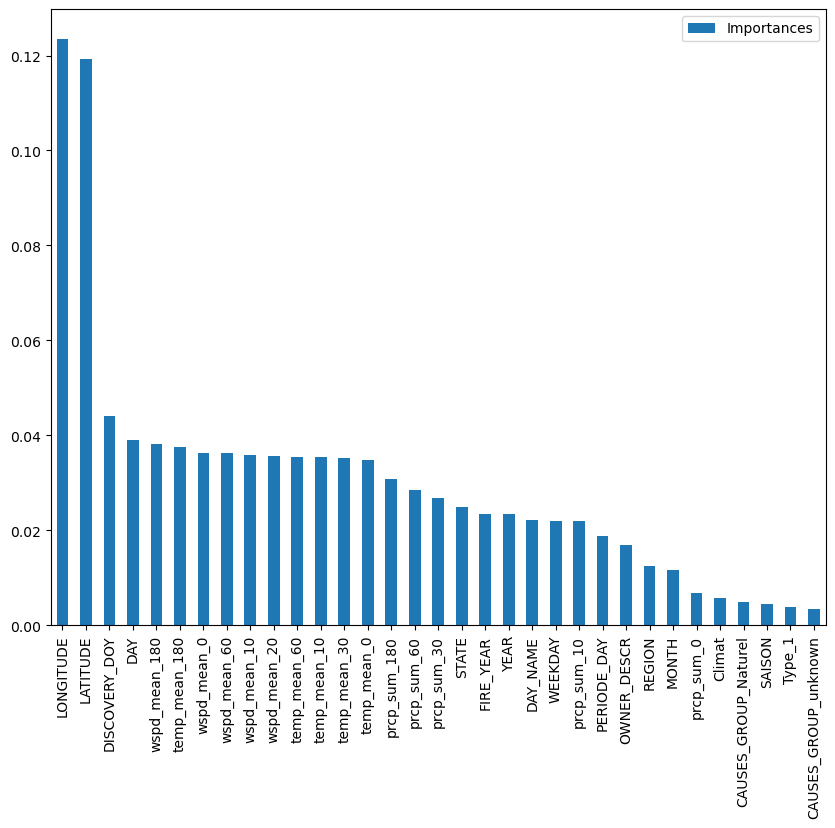

In [34]:
#Importances de chaques variables explicatives

feat_importances_arbre = pd.DataFrame(rf.feature_importances_,
                                      index = X_test_arbre.columns,
                                      columns = ['Importances'])

feat_importances_arbre.sort_values(by = 'Importances', ascending = False, inplace = True)

feat_importances_arbre.plot(kind = 'bar', figsize = (10,8))

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred_clf))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86    187785
           1       0.44      0.21      0.29     49846
           2       0.39      0.13      0.20      5080

    accuracy                           0.77    242711
   macro avg       0.54      0.43      0.45    242711
weighted avg       0.72      0.77      0.73    242711



# IV- Hyperparamètres

## Problématique : **Choix de la métrique**

Choix : 

- Est-ce que nous voulons détecter tous les feux de chaques catégories, au risque d'avoir des FP ? (rappel)

- Est-ce que nous souhaitons être précis sur une catégorie ? (precision)

- Est-ce que nous voulons un équilibre sur ces 2 approches ? (F1-score)

- Est-ce que nous voulons un modèle qui sache très bien distinguer les classes ? (ROC-AUC)

Je pars sur : 

- Est-ce que nous voulons un équilibre sur ces 2 approches ? (F1-score)


**Choix métrique :**

J'ai des classes déséquilibrée et je cherche à bien prédire les grands feux (large :2, very large:3)

- Pondère le F1-score par le support (taille des classes).

- Prend en compte rappel + précision.

- Sensible aux erreurs sur classes importantes si elles sont fréquentes ou pondérées.

## Paramètres RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_rf = RandomForestClassifier(criterion = 'gini', random_state=42)

param_grid_rf = {'n_estimators': [100, 150],
                 'max_depth': [10, 15, 20],
                 'min_samples_split': [5, 8, 10],
                 'min_samples_leaf': [1, 5, 10],
                 'max_features': ['sqrt'],
                 'class_weight': ['balanced', {0:1, 1:3, 2:10}]
}

clf_rf_final = GridSearchCV(
    estimator=clf_rf,                  # le modèle
    param_grid=param_grid_rf,          # la grille des hyperparamètres
    cv=3,                              # 3-fold cross-validation
    scoring='f1_macro',             # scoring adapté au multiclass
    n_jobs=-1,                         # parallélisation
    refit=True,
    return_train_score=True
)

clf_rf_final.fit(X_train_arbre, y_train_encoded)
print(clf_rf_final.best_params_)

/opt/anaconda3/envs/feux_usa_env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'class_weight': {0: 1, 1: 3, 2: 10}, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 150}


# V- Modèles avec hyperparamètres

## Test des hyperparamètres

{'class_weight': {0: 1, 1: 3, 2: 10}, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 150}

Score sur ensemble Train :  0.634431384747863
Score sur ensemble Test :  0.6347755149127975


Classes prédites,0,1,2
Classes réelles,,,
0,127663,53666,6456
1,22523,25024,2299
2,2110,1590,1380


              precision    recall  f1-score   support

           0       0.84      0.68      0.75    187785
           1       0.31      0.50      0.38     49846
           2       0.14      0.27      0.18      5080

    accuracy                           0.63    242711
   macro avg       0.43      0.48      0.44    242711
weighted avg       0.72      0.63      0.66    242711



<Axes: >

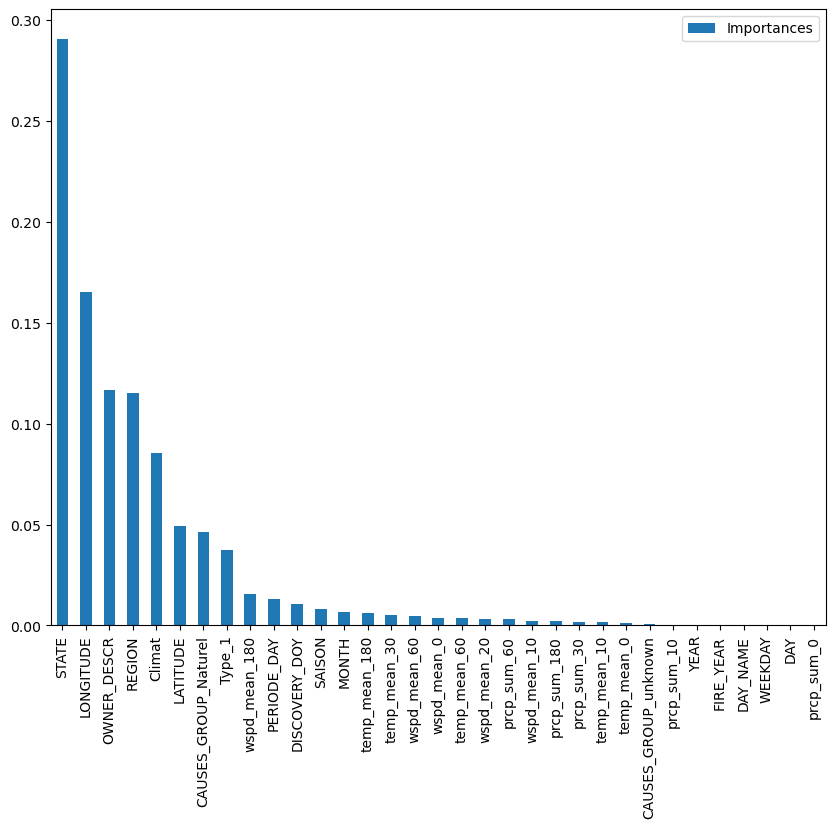

In [ ]:
#Instanciation du modèle
rf2 = RandomForestClassifier(max_depth= 20, 
                            max_features =  'sqrt', 
                            min_samples_split= 5,
                            min_samples_leaf=10,
                            n_estimators= 150,
                            class_weight={0:1, 1:3, 2:10},
                            criterion = 'gini', 
                            random_state=42,
                            ccp_alpha=0.001
                            )

#Entraînement du modèle
rf2.fit(X_train_arbre, y_train_encoded)

print("Score sur ensemble Train : ", rf2.score(X_train_arbre, y_train_encoded))
print("Score sur ensemble Test : ", rf2.score(X_test_arbre, y_test_encoded))

# Évaluation du modèle
from sklearn.metrics import classification_report

y_pred_rf2= rf2.predict(X_test_arbre)
display(pd.crosstab(y_test_encoded, y_pred_rf2, rownames = ['Classes réelles'], colnames = ['Classes prédites']))

print(classification_report(y_test_encoded, y_pred_rf2))

#Importances de chaques variables explicatives

feat_importances_arbre = pd.DataFrame(rf2.feature_importances_,
                                      index = X_test_arbre.columns,
                                      columns = ['Importances'])

feat_importances_arbre.sort_values(by = 'Importances', ascending = False, inplace = True)

feat_importances_arbre.plot(kind = 'bar', figsize = (10,8))

## Suppression variables

Suppresssion **7 dernières variables**

In [ ]:

X_train_arbre8 = X_train_arbre[['STATE', 'LONGITUDE', 'OWNER_DESCR', 'REGION', 'Climat', 'LATITUDE', 'CAUSES_GROUP_Naturel', 'Type_1']]
X_test_arbre8 = X_test_arbre[['STATE', 'LONGITUDE', 'OWNER_DESCR', 'REGION', 'Climat', 'LATITUDE', 'CAUSES_GROUP_Naturel', 'Type_1']]

{'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

## Modèle avec 8 variables

class_weight : total observations / (number of classes * observations in class)

In [ ]:
#Instanciation du modèle
rf_bi = RandomForestClassifier(max_depth= 20, 
                            max_features =  'sqrt', 
                            min_samples_split= 5,
                            min_samples_leaf=10,
                            n_estimators= 150,
                            class_weight={0:1, 1:3, 2:10},
                            criterion = 'gini', 
                            random_state=42,
                            ccp_alpha=0.001
                            )

#Entraînement du modèle
rf_bi.fit(X_train_arbre8, y_train_encoded)

print("Score sur ensemble Train : ", rf_bi.score(X_train_arbre8, y_train_encoded))
print("Score sur ensemble Test : ", rf_bi.score(X_test_arbre8, y_test_encoded))

Score sur ensemble Train :  0.642138105003806
Score sur ensemble Test :  0.6421793820634417


In [ ]:
# Évaluation du modèle
from sklearn.metrics import classification_report

y_pred_clf_bi= rf_bi.predict(X_test_arbre8)
display(pd.crosstab(y_test_encoded, y_pred_clf_bi, rownames = ['Classes réelles'], colnames = ['Classes prédites']))

print(classification_report(y_test_encoded, y_pred_clf_bi))

Classes prédites,0,1,2
Classes réelles,,,
0,130195,49645,7945
1,22890,24097,2859
2,1965,1543,1572


              precision    recall  f1-score   support

           0       0.84      0.69      0.76    187785
           1       0.32      0.48      0.39     49846
           2       0.13      0.31      0.18      5080

    accuracy                           0.64    242711
   macro avg       0.43      0.50      0.44    242711
weighted avg       0.72      0.64      0.67    242711



<Axes: >

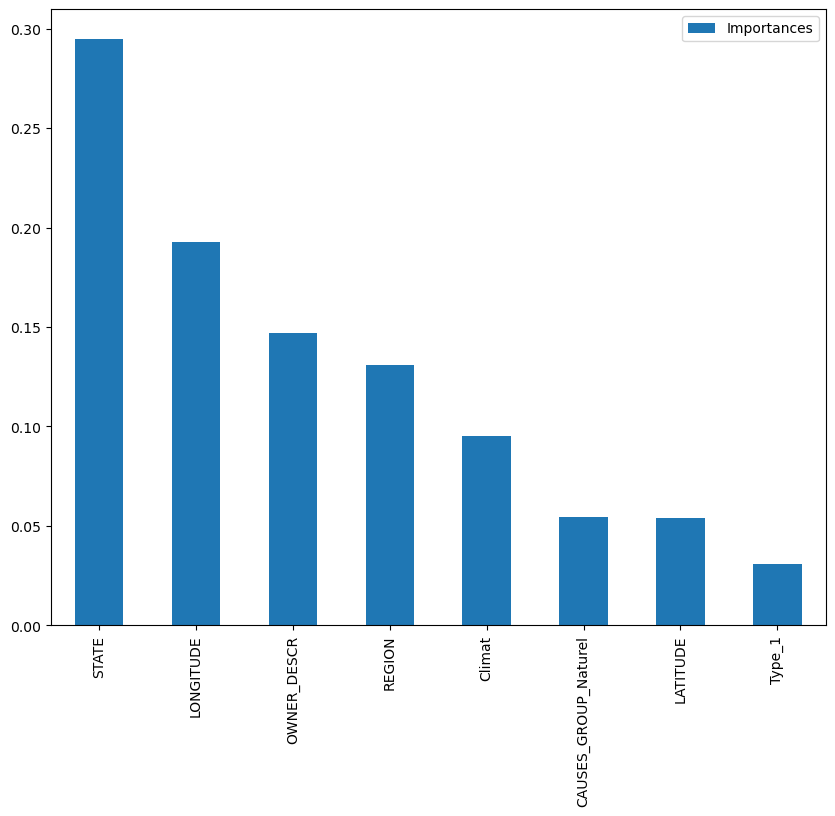

In [ ]:
#Importances de chaques variables explicatives

feat_importances_arbre = pd.DataFrame(rf_bi.feature_importances_,
                                      index = X_test_arbre8.columns,
                                      columns = ['Importances'])

feat_importances_arbre.sort_values(by = 'Importances', ascending = False, inplace = True)

feat_importances_arbre.plot(kind = 'bar', figsize = (10,8))

# VI- SHAP

In [ ]:
import shap

# Sample background dataset (pour l'explainer) : petit échantillon
background_indices = np.random.choice(len(X_train_arbre), size=1000, replace=False)
background = X_train_arbre.iloc[background_indices]

# Sample test data pour expliquer (ex : 10 000 observations)
sample_indices = np.random.choice(len(X_test_arbre), size=1000, replace=False)
X_test_sample = X_test_arbre.iloc[sample_indices]

# Réordonne les colonnes au cas où (pour être sûr)
X_test_sample = X_test_sample[X_train_arbre.columns]

# Crée l'explainer avec un background raisonnable
explainer = shap.TreeExplainer(rf_b, background)

# Calcule les SHAP values sur l'échantillon test
shap_values = explainer.shap_values(X_test_sample)


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(rf_b, X_train_arbre)
shap_values = explainer.shap_values(X_test_sample)

: 

In [ ]:
class_labels = {'small': 0, 'medium': 1, 'very_large': 2}

# Convertir shap_values en ndarray si nécessaire
shap_values = np.array(shap_values)  # (10000, 31, 4)

# Restructurer en liste par classe
shap_values_per_class = [shap_values[:,:,i] for i in range(shap_values.shape[2])]

# Maintenant shap_values_per_class[i].shape == (10000, 31)
for i, label in enumerate(class_labels):
    print(f"Summary plot pour la classe {label}")
    shap.summary_plot(shap_values_per_class[i], X_test_sample, feature_names=X_test_sample.columns)

In [ ]:
import shap
shap.initjs()

# Classe 0
shap.force_plot(
    explainer.expected_value[0], 
    shap_values_per_class[0][0], 
    X_test_sample.iloc[0]
)


In [ ]:
# Exemple pour la feature 'feature_name' (remplace par ta feature)
shap.dependence_plot('STATE', shap_values_per_class[0], X_test_sample)

In [ ]:
for i, label in enumerate(class_labels):
    print(f"Bar plot pour la classe {label}")
    shap.summary_plot(shap_values_per_class[i], X_test_sample, plot_type="bar")


In [ ]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values_per_class[0][0], 
        base_values=explainer.expected_value[0], 
        data=X_test_sample.iloc[0]
    )
)

# VI- Under/Over-Sampling

## Undersampling

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

ru = RandomUnderSampler()
X_ru, y_ru = ru.fit_resample(X_train_arbre8, y_train_encoded)

print("Les classes échantillons oversampled : ", dict(pd.Series(y_ru).value_counts()))

Les classes échantillons oversampled :  {0: np.int64(20586), 1: np.int64(20586), 2: np.int64(20586)}


In [ ]:
from imblearn.metrics import classification_report_imbalanced

#Instanciation du modèle
rf_ru = RandomForestClassifier(max_depth= 20, 
                            max_features =  'sqrt', 
                            min_samples_split= 5,
                            min_samples_leaf=10,
                            n_estimators= 150,
                            class_weight={0:1, 1:3, 2:10},
                            criterion = 'gini', 
                            random_state=42,
                            ccp_alpha=0.001
                            )

#Entraînement du modèle
rf_ru.fit(X_ru, y_ru)

y_pred_ru = rf_ru.predict(X_test_arbre8)

print("Score sur ensemble Train : ", rf_ru.score(X_ru, y_ru))
print("Score sur ensemble Test : ", rf_ru.score(X_test_arbre8, y_test_encoded))

display(pd.crosstab(y_test_encoded, y_pred_ru, rownames = ['Classes réelles'], colnames = ['Classes prédites']))

Score sur ensemble Train :  0.47362285048090935
Score sur ensemble Test :  0.14692782774575525


Classes prédites,0,1,2
Classes réelles,,,
0,10091,84593,93101
1,316,20745,28785
2,15,240,4825


In [ ]:
print(classification_report(y_test_encoded, y_pred_ru))

              precision    recall  f1-score   support

           0       0.97      0.05      0.10    187785
           1       0.20      0.42      0.27     49846
           2       0.04      0.95      0.07      5080

    accuracy                           0.15    242711
   macro avg       0.40      0.47      0.15    242711
weighted avg       0.79      0.15      0.14    242711



## OverSampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train_arbre8, y_train_encoded)

print("Les classes échantillons oversampled : ", dict(pd.Series(y_ro).value_counts()))

Les classes échantillons oversampled :  {0: np.int64(751597), 1: np.int64(751597), 2: np.int64(751597)}


In [ ]:

#Instanciation du modèle
rf_ros = RandomForestClassifier(max_depth= 20, 
                            max_features =  'sqrt', 
                            min_samples_split= 5,
                            min_samples_leaf=10,
                            n_estimators= 150,
                            class_weight={0:1, 1:3, 2:10},
                            criterion = 'gini', 
                            random_state=42,
                            ccp_alpha=0.001
                            )


# Entraînement sur l'ensemble train
rf_ros.fit(X_ro, y_ro)

y_pred_ros = rf_ros.predict(X_test_arbre8)

print("Score sur ensemble Train : ", rf_ros.score(X_ro, y_ro))
print("Score sur ensemble Test : ", rf_ros.score(X_test_arbre8, y_test_encoded))

display(pd.crosstab(y_test_encoded, y_pred_ros, rownames = ['Classes réelles'], colnames = ['Classes prédites']))

Score sur ensemble Train :  0.4705464941096536
Score sur ensemble Test :  0.14061579409256275


Classes prédites,0,1,2
Classes réelles,,,
0,8644,85597,93544
1,241,20659,28946
2,5,249,4826


In [ ]:
print(classification_report(y_test_encoded, y_pred_ros))

              precision    recall  f1-score   support

           0       0.97      0.05      0.09    187785
           1       0.19      0.41      0.26     49846
           2       0.04      0.95      0.07      5080

    accuracy                           0.14    242711
   macro avg       0.40      0.47      0.14    242711
weighted avg       0.79      0.14      0.12    242711



## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train_arbre8, y_train_encoded)

print("Les classes échantillons oversampled : ", dict(pd.Series(y_sm).value_counts()))

#Instanciation du modèle
rf_sm = RandomForestClassifier(max_depth= 20, 
                            max_features =  'sqrt', 
                            min_samples_split= 5,
                            min_samples_leaf=10,
                            n_estimators= 150,
                            class_weight={0:1, 1:3, 2:10},
                            criterion = 'gini', 
                            random_state=42,
                            ccp_alpha=0.001
                            )


# Entraînement sur l'ensemble train
rf_sm.fit(X_sm, y_sm)

y_pred_ros = rf_sm.predict(X_test_arbre8)

print("Score sur ensemble Train : ", rf_sm.score(X_sm, y_sm))
print("Score sur ensemble Test : ", rf_sm.score(X_test_arbre8, y_test_encoded))

display(pd.crosstab(y_test_encoded, y_pred_ros, rownames = ['Classes réelles'], colnames = ['Classes prédites']))